In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import check_random_state
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (6.5, 6.5)
plt.rcParams['figure.facecolor'] = 'white'
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

In [ ]:
def euclidean_distance(u, v):
    return np.linalg.norm(u - v)

#compute vect norm
def norm(x, axis=None):
    return np.linalg.norm(x, axis=axis)

#compute poincare distance between two vectors
def poincare_dist(u, v, eps=1e-5):
    d = 1 + 2 * norm(u-v)**2 / ((1 - norm(u)**2) * (1 - norm(v)**2) + eps)
    return np.arccosh(d)

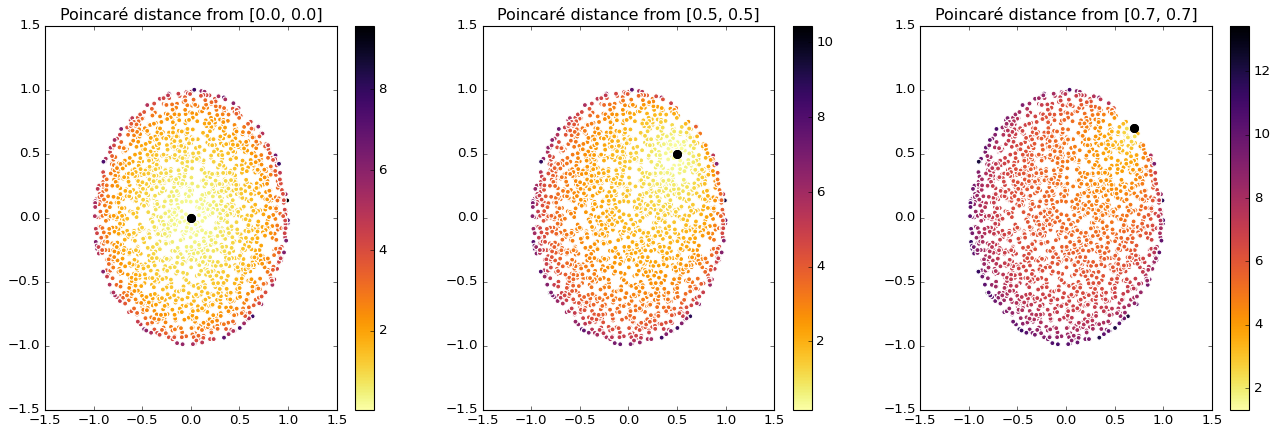

In [ ]:
# plot unit circle in R^2
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 3, 1)

# sample within unit circle in R^2
n = 2000
theta = np.random.uniform(0, 2*np.pi, n)
u = np.random.uniform(0, 1, n)
r = np.sqrt(u)
X = np.array([r * np.cos(theta), r * np.sin(theta)]).T
i = np.random.choice(n)

xi = [0.0, 0.0]
dist_xi = [poincare_dist(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Poincaré distance from ' + str(xi))
plt.colorbar(im)

ax = fig.add_subplot(1, 3, 2)
xi = [0.5, 0.5]
dist_xi = [poincare_dist(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Poincaré distance from ' + str(xi))
plt.colorbar(im);

ax = fig.add_subplot(1, 3, 3)
xi = [0.7, 0.7]
dist_xi = [poincare_dist(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Poincaré distance from ' + str(xi))
plt.colorbar(im)
plt.show();

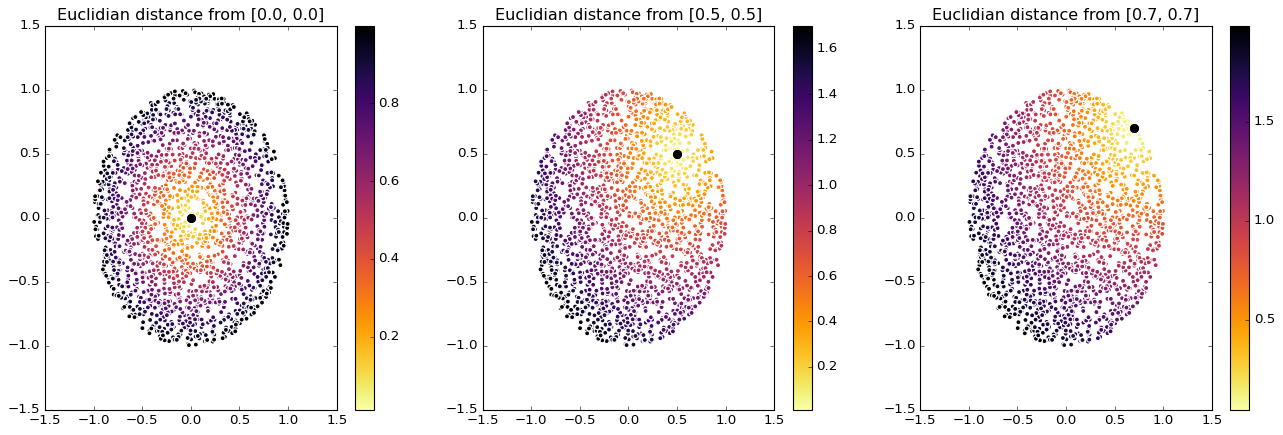

In [ ]:
# plot unit circle in R^2
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1, 3, 1)

# sample within unit circle in R^2
n = 2000
theta = np.random.uniform(0, 2*np.pi, n)
u = np.random.uniform(0, 1, n)
r = np.sqrt(u)
X = np.array([r * np.cos(theta), r * np.sin(theta)]).T
i = np.random.choice(n)

xi = [0.0, 0.0]
dist_xi = [euclidean_distance(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Euclidian distance from ' + str(xi))
plt.colorbar(im)

ax = fig.add_subplot(1, 3, 2)
xi = [0.5, 0.5]
dist_xi = [euclidean_distance(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Euclidian distance from ' + str(xi))
plt.colorbar(im);

ax = fig.add_subplot(1, 3, 3)
xi = [0.7, 0.7]
dist_xi = [euclidean_distance(xi, x) for x in X]
im = ax.scatter(X[:,0], X[:,1], s=20, c=dist_xi, cmap='inferno_r', edgecolors='white')
ax.scatter(xi, xi, s =50, c='black')
ax.set_title('Euclidian distance from ' + str(xi))
plt.colorbar(im)
plt.show();

**FAMILLY**

In [ ]:
def initial_embeddings(relations_list, low=-0.001, high=0.001):
    unique_nodes = np.unique([item for sublist in relations_list for item in sublist])
    emb = theta_init = np.random.uniform(low, high, size=(len(unique_nodes), 2))
    emb_dict = dict(zip(unique_nodes, emb))
    {k: emb_dict[k] for k in list(emb_dict)[:10]}
    return emb_dict

In [ ]:
relation_list = [
    ['kangaroo', 'marsupial'],
    ['marsupial', 'mammal'],
    ['kangaroo', 'mammal'],
    ['gib', 'cat'],
    ['gib', 'mammal'],
    ['cow', 'mammal'],
    ['cat', 'pet'],
    ['cat', 'mammal'],
    ['dog', 'pet'],
    ['dog', 'mammal'],
    ['dolphin', 'mammal'],
    ['dolphin', 'cetacean'],
    ['whale', 'cetacean'],
    ['whale', 'mammal'],
    ['bat', 'mammal'],
    ['bat', 'flying_mammal'],
    ['lion', 'big_cat'],
    ['lion', 'mammal'],
    ['tiger', 'big_cat'],
    ['tiger', 'mammal'],
    ['elephant', 'mammal'],
    ['hamster', 'pet'],
    ['hamster', 'rodent'],
    ['hamster', 'mammal'],
    ['rabbit', 'pet'],
    ['rabbit', 'mammal'],
    ['mouse', 'rodent'],
    ['mouse', 'mammal'],
    ['squirrel', 'rodent'],
    ['squirrel', 'mammal']
]


In [ ]:
emb = initial_embeddings(relation_list)

In [ ]:
emb

{'bat': array([-0.00020603,  0.00074123]),
 'big_cat': array([-0.00082676,  0.00030903]),
 'cat': array([-6.96913251e-04,  3.80795389e-05]),
 'cetacean': array([-0.00051199, -0.00093684]),
 'cow': array([-0.00044221, -0.00093972]),
 'dog': array([-0.00023385, -0.00050177]),
 'dolphin': array([-0.0001507 ,  0.00047873]),
 'elephant': array([-1.67466275e-05,  5.20412212e-04]),
 'flying_mammal': array([0.00051279, 0.00060237]),
 'gib': array([-6.98459842e-05,  6.27901579e-04]),
 'hamster': array([-3.44156698e-05,  1.84958935e-04]),
 'kangaroo': array([-0.00066687, -0.00073218]),
 'lion': array([0.00067283, 0.00076025]),
 'mammal': array([-0.00037394,  0.00080241]),
 'marsupial': array([-0.00040538,  0.0002155 ]),
 'mouse': array([0.00051199, 0.00033939]),
 'pet': array([2.93999871e-05, 7.06635609e-04]),
 'rabbit': array([0.00024643, 0.00081315]),
 'rodent': array([9.08317289e-04, 3.50006589e-05]),
 'squirrel': array([0.00011353, 0.00079672]),
 'tiger': array([ 0.00088344, -0.00087887]),
 

In [ ]:
import time

def negative_sample(data, u, n_samples):
    positives = [x[1] for x in data if x[0] == u]
    unique_nodes = np.unique([item for sublist in data for item in sublist])
    negatives = np.array([x for x in unique_nodes if x not in positives])
    #negatives = np.array([x[1] for x in data if x[1] not in positives])
    random_ix = np.random.permutation(len(negatives))[:n_samples]
    neg_samples = [[u, x] for x in negatives[random_ix]]
    neg_samples.append([u,u])
    return neg_samples

eps = 1e-5
def partial_d(theta, x):
    alpha = 1 - norm(theta)**2
    beta = 1 - norm(x)**2
    gamma = 1 + 2/(alpha*beta + eps) * norm(theta-x)**2
    lhs = 4 / (beta*np.sqrt(gamma**2 - 1) + eps)
    rhs = 1/(alpha**2 + eps) * (norm(x)**2 - 2*np.inner(theta,x) + 1) * theta - x/(alpha + eps)
    return lhs*rhs

def proj(theta):
    if norm(theta) >= 1:
        theta = theta/norm(theta) - eps
    return theta

def update(u, lr, grad, embeddings, test=False):
    theta = embeddings[u]
    step = 1/4 * lr*(1 - norm(theta)**2)**2 * grad
    embeddings[u] = proj(theta - step)
    if test:
        if norm(proj(theta - step) < norm(theta)):
            print('updating '+u+' closer to origin')
        else:
            print('updating ' +u+ ' away from origin')
    return


def train_poincare(relations, emb_dict, lr=0.01, num_epochs=10, num_neg=10):
    copied_dict = emb_dict.copy()
    loss_history = []
    dict_history = [copied_dict.copy()]
    for i in range(num_epochs):
        #loss=0
        start = time.time()
        for relation in relations:
            u, v = relation[0], relation[1]
            if u == v:
                continue

            theta, x = copied_dict[u], copied_dict[v]

            neg_relations = [x[1] for x in negative_sample(relations, u, num_neg)]
            neg_embed = np.array([copied_dict[x] for x in neg_relations])

            dd_theta = partial_d(theta, x)
            dd_x = partial_d(x, theta)

            dloss_theta = -1
            dloss_x = 1
            grad_theta = dloss_theta * dd_theta
            grad_x = dloss_x * dd_x
            update(u, lr, grad_theta, copied_dict)
            update(v, lr, grad_x, copied_dict)

            neg_exp_dist = np.array([np.exp(-poincare_dist(theta, v_prime)) for v_prime in neg_embed])
            Z = neg_exp_dist.sum(axis=0)
            for vprime in neg_relations:
                dd_vprime = partial_d(copied_dict[vprime], theta)
                dd_u = partial_d(theta, copied_dict[vprime])
                dloss_vprime = -np.exp(-poincare_dist(copied_dict[vprime], theta)) / Z
                dloss_u = -np.exp(-poincare_dist(theta, copied_dict[vprime])) / Z
                grad_vprime = dd_vprime * dloss_vprime
                grad_u = dd_u * dloss_u
                update(vprime, lr, grad_vprime, copied_dict)
                update(u, lr, grad_u, copied_dict)
            #loss = loss + np.log(np.exp(-poincare_dist(theta, x))) / Z

        print('COMPLETED EPOCH ', i+1)
        print('---------- total seconds: ', time.time() - start)
        dict_history.append(copied_dict.copy())
    return dict_history, loss_history

In [ ]:
def positive_ranks(item, relations, embedding_dict):
    theta = embedding_dict[item]
    distances = [poincare_dist(theta, x) for x in np.array(list(embedding_dict.values()))]
    positives = [x[1] for x in relations if x[0] == item]
    keys = list(embedding_dict.keys())
    ranks = [keys[i] for i in np.argsort(distances)]
    pos_ranks = [j for j in range(len(ranks)) if ranks[j] in positives]
    return pos_ranks
#positive_ranks('antelope.n.01', mammal_relations, emb_dict)

# positive ranks = [a, b, c, d] -> avg precision = avg(1/a + 2/b + 3/c + 4/d)
def avg_precision(item, relations, embedding_dict):
    ranks = positive_ranks(item, relations, embedding_dict)
    map_ranks = np.sort(ranks) + np.arange(len(ranks))
    avg_precision = ((np.arange(1, len(map_ranks) + 1) / np.sort(map_ranks)).mean())
    return avg_precision

def mean_average_precision(relations, embedding_dict):
    avg_precisions = []
    ranks = []
    for item in list(embedding_dict.keys()):
        if not np.isnan(avg_precision(item, relations, embedding_dict)):
            avg_precisions.append(avg_precision(item, relations, embedding_dict))
        if len(positive_ranks(item, relations, embedding_dict)) != 0:
            ranks = ranks+positive_ranks(item, relations, embedding_dict)
    return [ranks, avg_precisions]

def dist_squared(x, y, axis=None):
    return np.sum((x - y)**2, axis=axis)

def get_subtree(relations, embedding_dict, root_node):
    root_emb = embedding_dict[root_node]
    child_nodes = [x[0] for x in relations if x[1] == root_node]
    child_emb = np.array([embedding_dict[x[0]] for x in relations if x[1] == root_node])
    return [child_nodes, child_emb]
#get_subtree(mammal_relations, emb_dict, 'feline')
#for child in get_subtree(mammal_relations, embedding_dict, 'feline.n.01'):
#    ax.plot([embedding_dict['feline.n.01'][0], child[0]], [embedding_dict['feline.n.01'][1], child[1]], '--',

In [ ]:
def plot_embedding(embedding_dict, title):
    fig = plt.figure(figsize=(8, 8))
    plt.grid(False)
    plt.xlim([-1.0, 1.0])
    plt.ylim([-1.0, 1.0])
    plt.axis('off')
    ax = plt.gca()
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linewidth=1)
    ax.add_artist(circle)

    props = dict(boxstyle='round', lw=2, edgecolor='white', color='orange')

    for key, value in embedding_dict.items():
        _ = ax.scatter(value[0], value[1], s=10)
        _ = ax.text(value[0], value[1]+0.01, s=key.split('.')[0],
                    size=8, verticalalignment='top', bbox=props)

    plt.title(title, size=20)
    plt.show()


In [ ]:
dicts, losses = train_poincare(relation_list, emb, lr=0.01, num_epochs=300)

COMPLETED EPOCH  1
---------- total seconds:  0.0852508544921875
COMPLETED EPOCH  2
---------- total seconds:  0.0749657154083252
COMPLETED EPOCH  3
---------- total seconds:  0.07817268371582031
COMPLETED EPOCH  4
---------- total seconds:  0.1032874584197998
COMPLETED EPOCH  5
---------- total seconds:  0.0854637622833252
COMPLETED EPOCH  6
---------- total seconds:  0.07955312728881836
COMPLETED EPOCH  7
---------- total seconds:  0.08239865303039551
COMPLETED EPOCH  8
---------- total seconds:  0.0744483470916748
COMPLETED EPOCH  9
---------- total seconds:  0.07567405700683594
COMPLETED EPOCH  10
---------- total seconds:  0.08725404739379883
COMPLETED EPOCH  11
---------- total seconds:  0.07883977890014648
COMPLETED EPOCH  12
---------- total seconds:  0.07557368278503418
COMPLETED EPOCH  13
---------- total seconds:  0.0842287540435791
COMPLETED EPOCH  14
---------- total seconds:  0.07555317878723145
COMPLETED EPOCH  15
---------- total seconds:  0.07434678077697754
COMPLETED 

In [ ]:
emb_ranks, emb_precisions = mean_average_precision(relation_list, emb)
print('MEAN RANK: ', np.mean(emb_ranks))
print('MAP SCORE: ', np.mean(np.nan_to_num(emb_precisions)))

MEAN RANK:  11.586206896551724
MAP SCORE:  0.18955408464180395


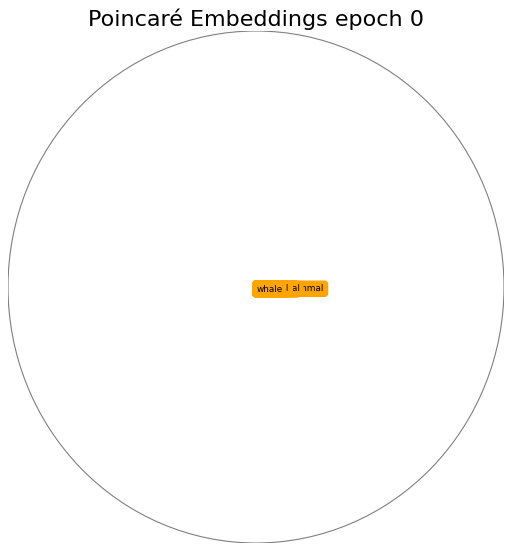

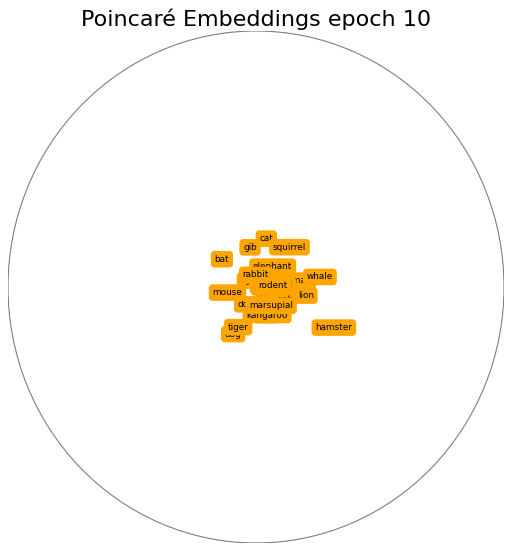

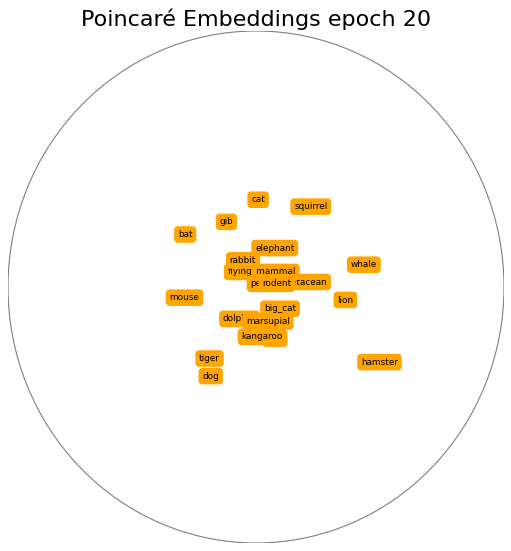

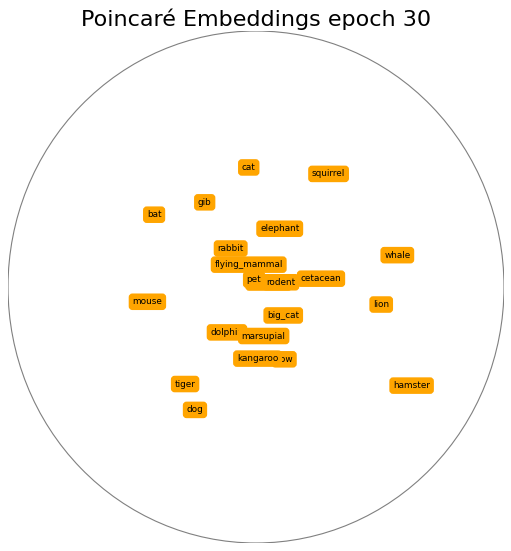

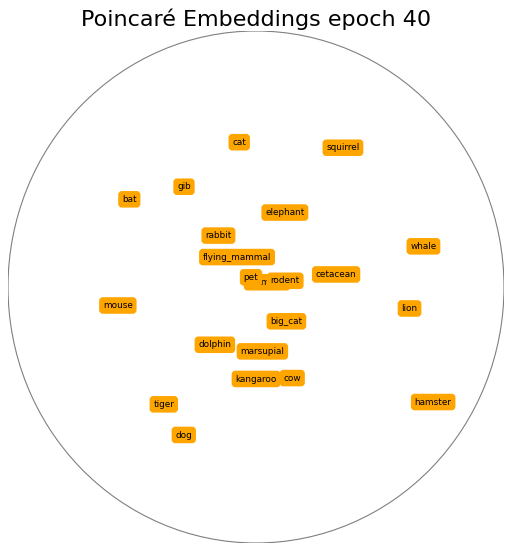

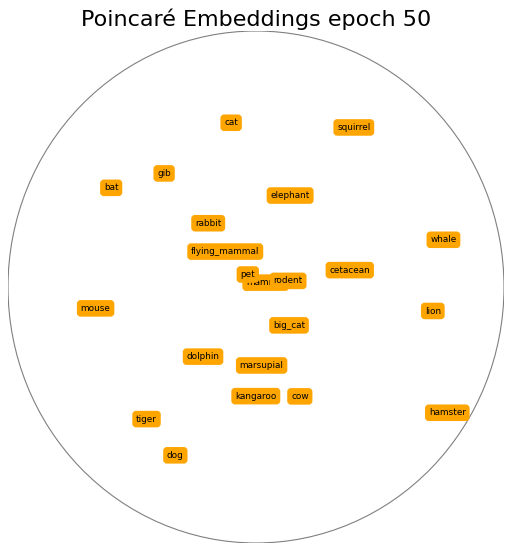

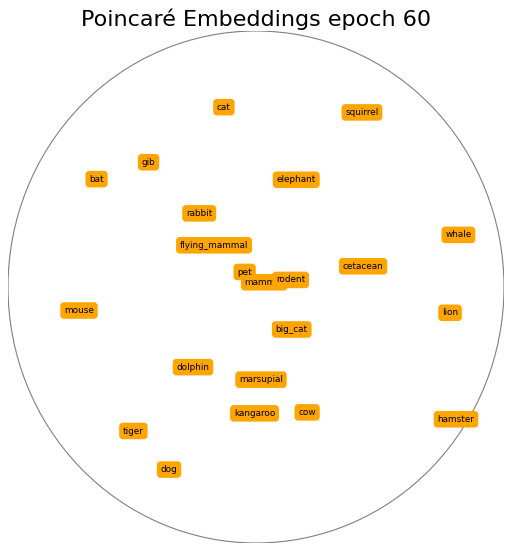

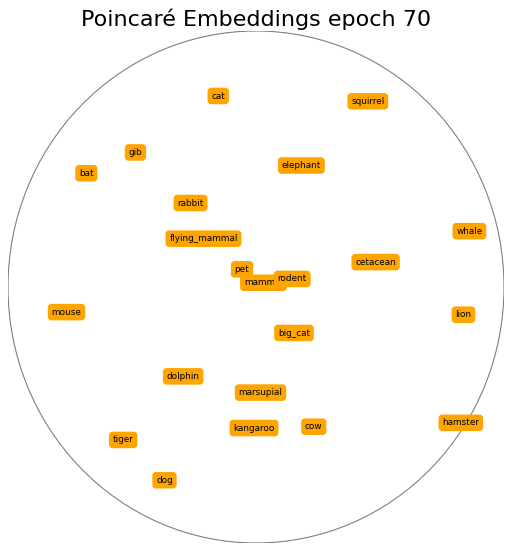

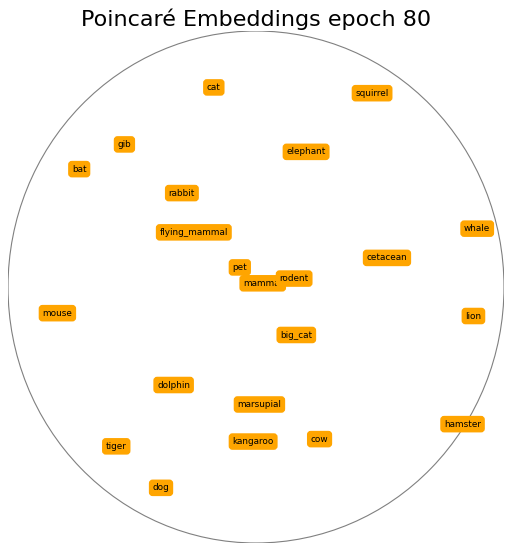

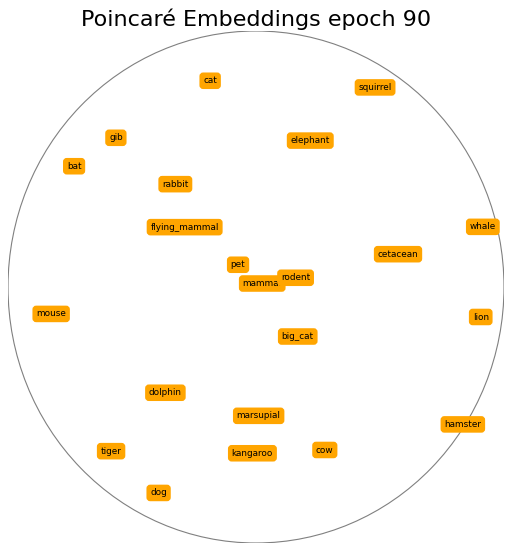

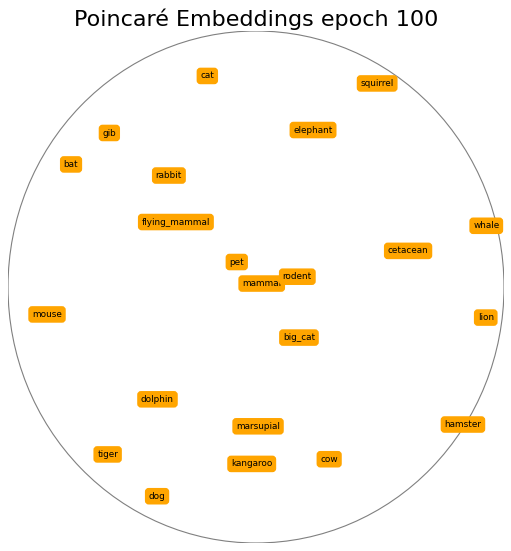

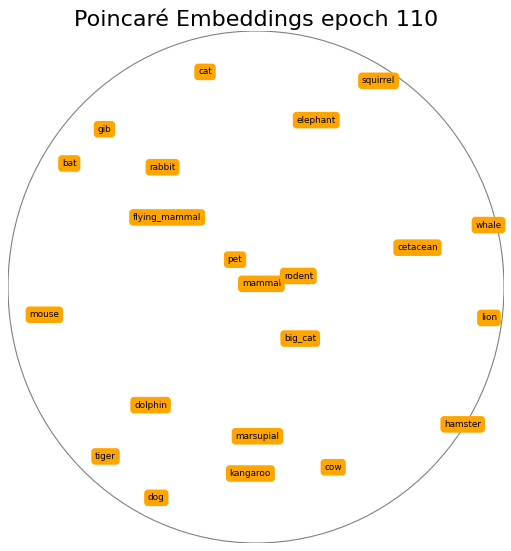

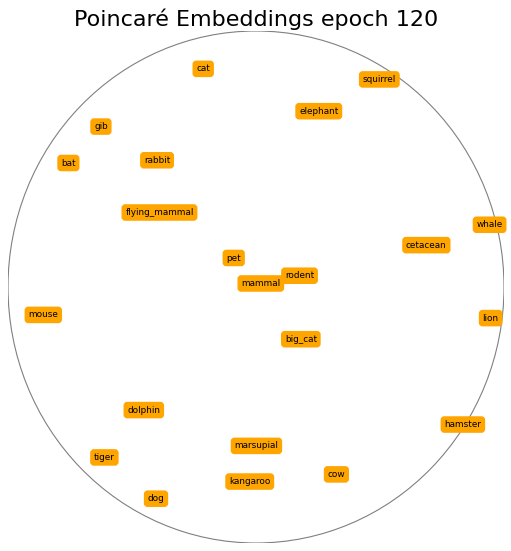

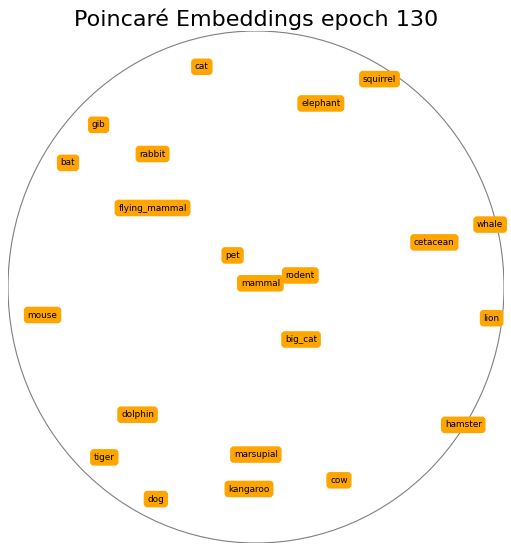

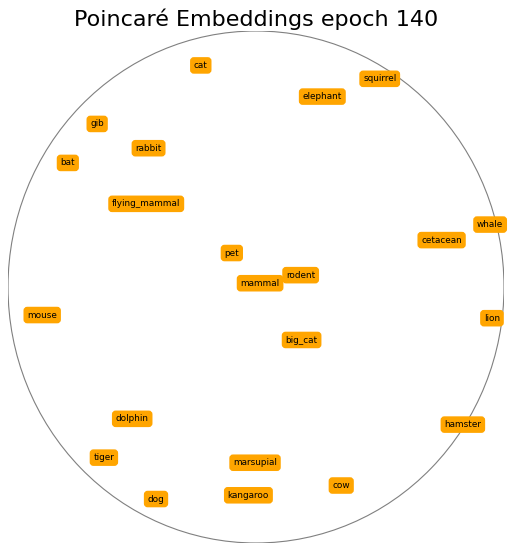

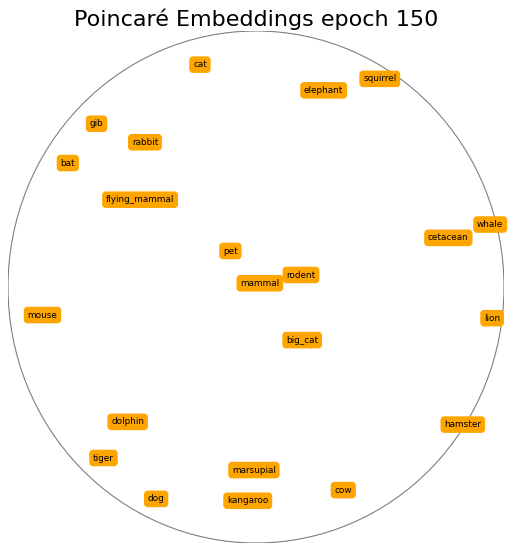

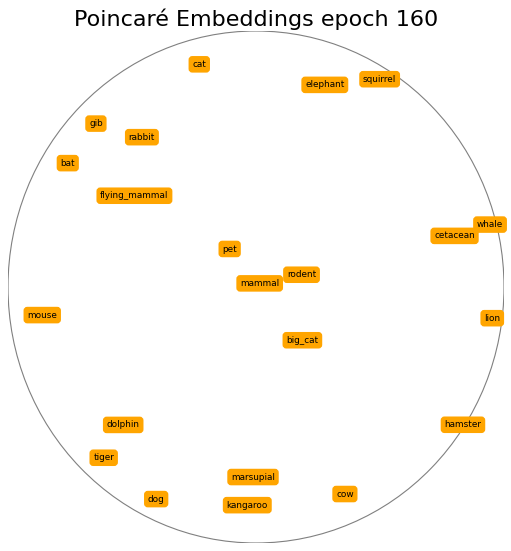

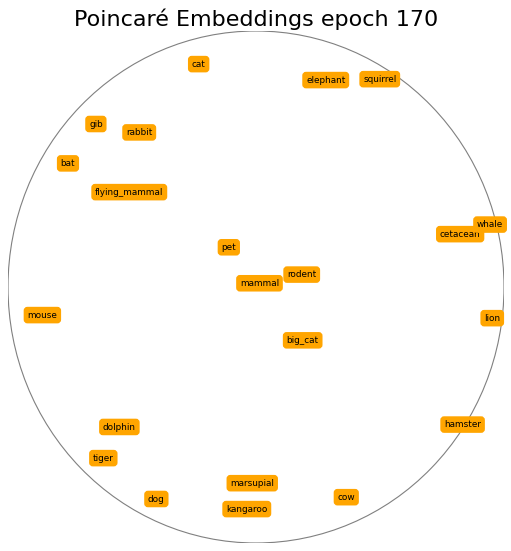

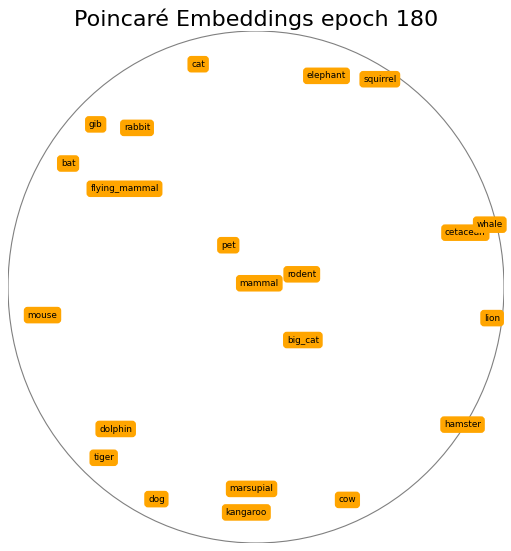

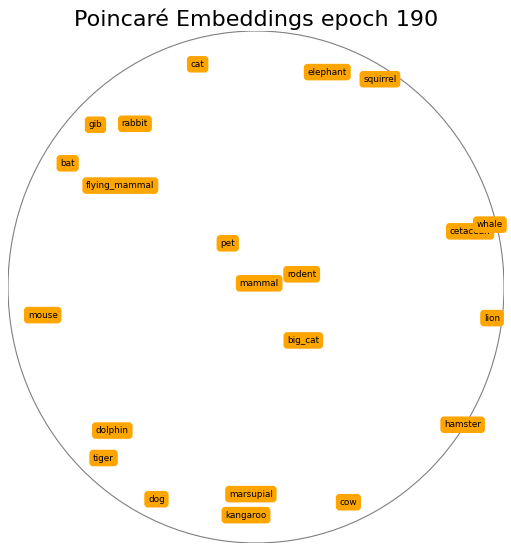

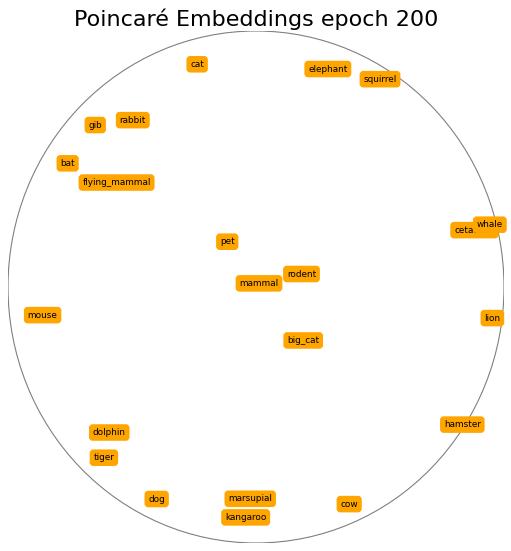

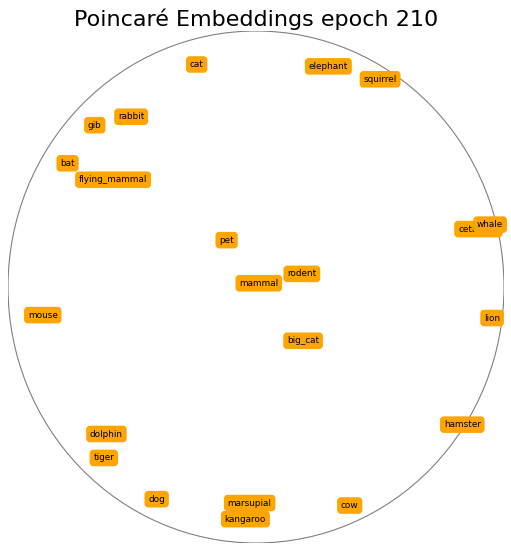

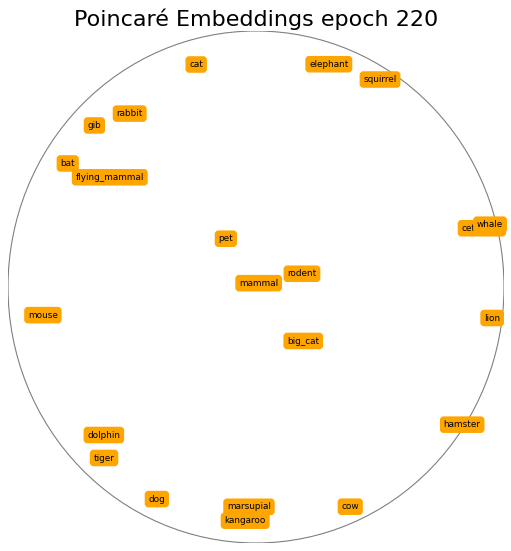

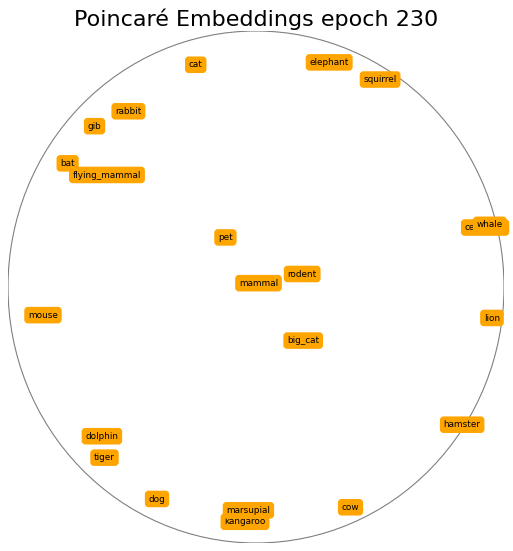

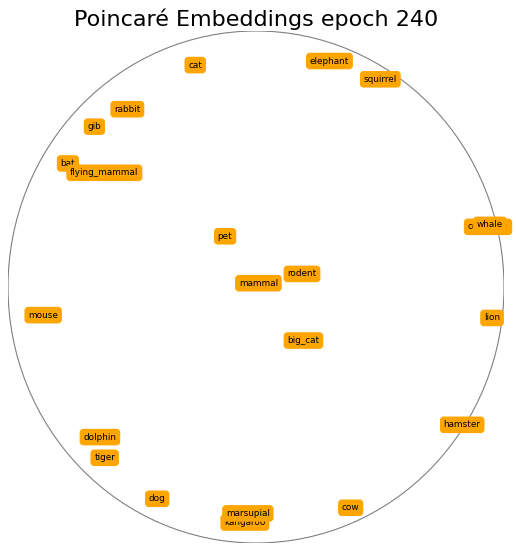

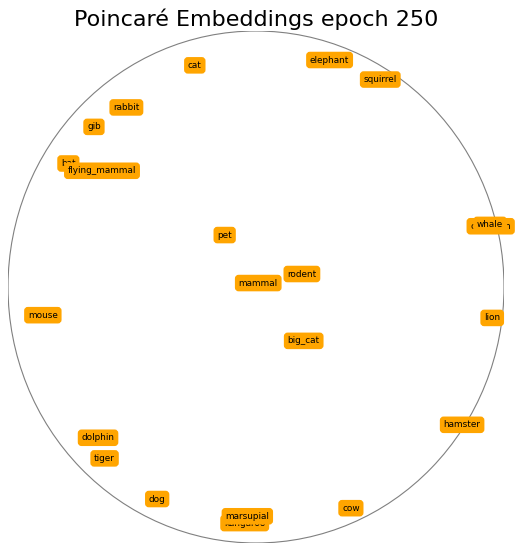

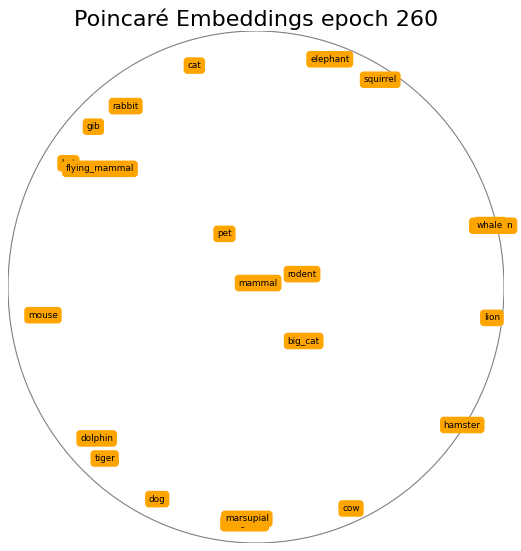

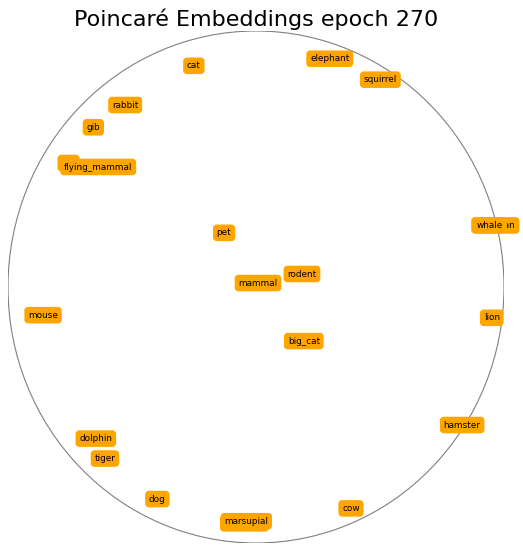

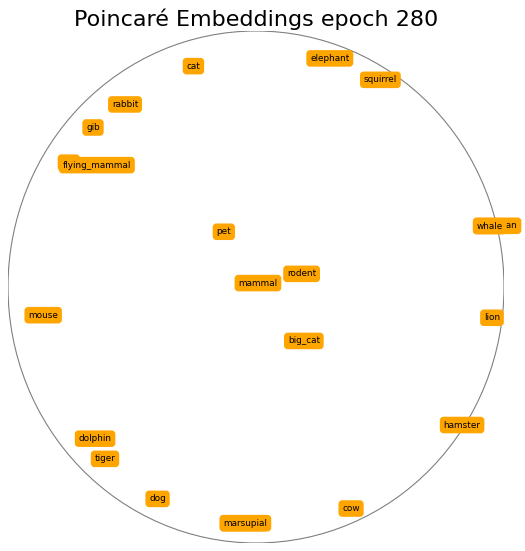

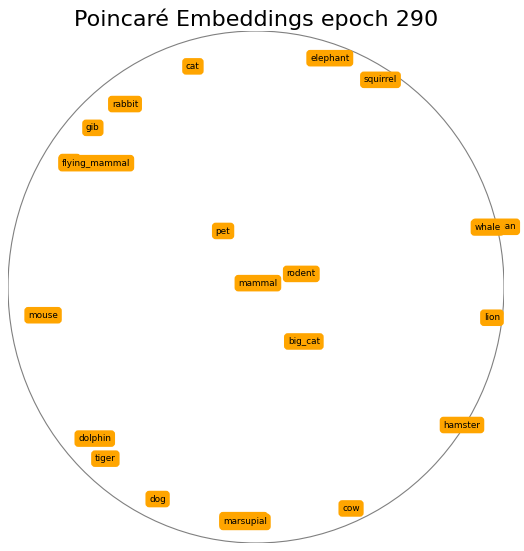

In [ ]:
for i in range(300):
    if (i % 10 == 0):
      plot_embedding(dicts[i],f'Poincaré Embeddings epoch {i}')